In [31]:
# Importing necessary libraries and importing CSV files into respective dataframes

import pandas as pd

df_CPI = pd.read_csv("/workspaces/MSCI466_Project/data/housing-affordability-in-canada/CPI-inflation-by-region-1914-202.csv")
df_Housing = pd.read_csv("/workspaces/MSCI466_Project/data/housing-affordability-in-canada/housing-supply-price-rental.csv")
df_HPIRegions = pd.read_csv("/workspaces/MSCI466_Project/data/housing-affordability-in-canada/HPI 1981-2022 by regions.csv")
df_HPIFederalandProvincial = pd.read_csv("/workspaces/MSCI466_Project/data/housing-affordability-in-canada/HPI 1981-2022 federal and provincial.csv")
df_Income = pd.read_csv("/workspaces/MSCI466_Project/data/housing-affordability-in-canada/income-distribution-2012-2020.csv")
df_Interest = pd.read_csv("/workspaces/MSCI466_Project/data/housing-affordability-in-canada/Interest and mortgage rates 1951-2022.csv")
df_PopulationDwellings = pd.read_csv("/workspaces/MSCI466_Project/data/housing-affordability-in-canada/population_dwellings_count.csv")
df_PopulationRegion = pd.read_csv("/workspaces/MSCI466_Project/data/housing-affordability-in-canada/population-by-region-1946-2022.csv")
df_Structural = pd.read_csv("/workspaces/MSCI466_Project/data/housing-affordability-in-canada/Structural-dwellings-household-size.csv")
df_CPI['GEO'].unique()


array(['Canada', "St. John's, Newfoundland and Labrador",
       'Halifax, Nova Scotia', 'Saint John, New Brunswick',
       'Québec, Quebec', 'Montréal, Quebec',
       'Ottawa-Gatineau, Ontario part, Ontario/Quebec',
       'Toronto, Ontario', 'Thunder Bay, Ontario', 'Winnipeg, Manitoba',
       'Regina, Saskatchewan', 'Saskatoon, Saskatchewan',
       'Edmonton, Alberta', 'Calgary, Alberta',
       'Vancouver, British Columbia',
       'Charlottetown and Summerside, Prince Edward Island',
       'Newfoundland and Labrador', 'Prince Edward Island', 'Nova Scotia',
       'New Brunswick', 'Quebec', 'Ontario', 'Manitoba', 'Saskatchewan',
       'Alberta', 'British Columbia', 'Whitehorse, Yukon',
       'Yellowknife, Northwest Territories', 'Victoria, British Columbia',
       'Iqaluit, Nunavut'], dtype=object)

In [32]:
# Removes region rows that aren't Canada and selects "All-items"
# df_CPI = df_CPI[df_CPI['GEO'] == 'Canada']
# df_CPI.drop(columns=['GEO'], inplace=True)

provinces = ['Prince Edward Island', 'Nova Scotia', 'New Brunswick', 'Quebec', 'Ontario', 'Manitoba', 'Saskatchewan', 'Alberta']

df_CPI = df_CPI[df_CPI['GEO'].isin(provinces)]


df_CPI = df_CPI[df_CPI['Products and product groups'] == 'All-items']
df_CPI.drop(columns=['Products and product groups'], inplace=True)

# Removes unnecessary columns
df_CPI.drop(columns=['DGUID'], inplace=True)
df_CPI.drop(columns=['UOM'], inplace=True)
df_CPI.drop(columns=['UOM_ID'], inplace=True)
df_CPI.drop(columns=['VECTOR'], inplace=True)
df_CPI.drop(columns=['COORDINATE'], inplace=True)

# Standardizes "Date" name and format
df_CPI['Date'] = df_CPI['REF_DATE'].astype(str) + '01'
df_CPI.drop(columns=['REF_DATE'], inplace=True)

# df_CPI.head(108)

In [33]:
# Standardizes "Date" format and name
df_Housing['Date'] = df_Housing['year'].astype(str).str.replace('.0', '').str.replace('.1', '') + '01'

df_Housing = df_Housing[['Date', 'region', 'population', 'total_dwelling', 'total_dwelling_market', 'labour_participation_rate', 'unemployment_rate', 'disposable_income_change', 
                         'rental_vacancy_rate', 'rental_avilability_rate', 'owned_accommodation_costs_change', 'rental_accommodation_costs_change']]

regions_to_include = ['manitoba', 'prince_edward', 'new_brunswick', 'saskatchewan', 'nova_scotia', 'quebec', 'alberta', 'ontario']

df_Housing = df_Housing[df_Housing['region'].isin(regions_to_include)]

province_mapping = {
    'manitoba': 'Manitoba',
    'prince_edward': 'Prince Edward Island',
    'new_brunswick': 'New Brunswick',
    'saskatchewan': 'Saskatchewan',
    'nova_scotia': 'Nova Scotia',
    'quebec': 'Quebec',
    'alberta': 'Alberta',
    'ontario': 'Ontario'
}

# Update province names in the DataFrame
df_Housing['region'] = df_Housing['region'].map(province_mapping)

df_Housing.shape

(216, 12)

In [34]:

df_HPIRegions = df_HPIRegions[df_HPIRegions['Type'] == 'House and Land']
df_HPIRegions.drop(columns = ['Type'], inplace=True)

# List of columns representing regions
regions_columns = ['Prince Edward Island', 'Nova Scotia', 'New Brunswick', 'Quebec', 'Ontario', 'Manitoba', 'Saskatchewan', 'Alberta']

# Melt the dataframe to transform the columns into a single 'region' column
df_HPIRegions = df_HPIRegions.melt(id_vars=['Month-year'], value_vars=regions_columns, var_name='region', value_name='value')
df_HPIRegions = df_HPIRegions.dropna()
df_HPIRegions.head(20)



# Converts "Month-year" to standard format and renames column to "Date"
df_HPIRegions['Month-year'] = pd.to_datetime(df_HPIRegions['Month-year'], format='%b-%y')
def adjust_year(date):
    
    if date.year - 2000 >= 25 and date.year - 2000 <= 99:
        return date.replace(year=date.year - 100)

    return date
df_HPIRegions['Month-year'] = df_HPIRegions['Month-year'].apply(adjust_year)
df_HPIRegions['Month-year'] = df_HPIRegions['Month-year'].dt.strftime('%Y%m')
df_HPIRegions.rename(columns={'Month-year': 'Date'}, inplace=True)
# df_HPIRegions.rename(columns={'Month-year': 'Date'}, inplace=True)

df_HPIRegions.head(1494)

,Date,region,value
60,198601,Prince Edward Island,83.5
61,198602,Prince Edward Island,83.5
62,198603,Prince Edward Island,83.5
63,198604,Prince Edward Island,83.5
64,198605,Prince Edward Island,83.5
...,...,...,...
1729,200008,Quebec,58.3
1730,200009,Quebec,58.6
1731,200010,Quebec,58.8
1732,200011,Quebec,59.0


In [35]:
df_Housing.shape

(216, 12)

In [36]:
merged_df = pd.merge(df_Housing, df_HPIRegions, left_on=['Date', 'region'], right_on=['Date', 'region'], how='left')
merged_df = pd.merge(merged_df, df_CPI, left_on=['Date', 'region'], right_on=['Date', 'GEO'])
merged_df = merged_df.dropna()
merged_df.drop(columns=['GEO'], inplace=True)
merged_df.rename(columns={'value': 'HPI'}, inplace=True)

# Calculate the number of months passed
merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='%Y%m')
# merged_df['Num of Months Passed'] = (merged_df['Date'] - merged_df['Date'].min()) // pd.Timedelta(days=30)
merged_df['year'] = merged_df['Date'].dt.year

merged_df.shape

(216, 15)

In [37]:
provinces = pd.get_dummies(merged_df['region'], prefix='region')
provinces = provinces.astype(int)
merged_df = merged_df.join(provinces)
merged_df = merged_df.drop(['region'], axis=1) 
merged_df.head()

,Date,population,total_dwelling,total_dwelling_market,labour_participation_rate,unemployment_rate,disposable_income_change,rental_vacancy_rate,rental_avilability_rate,owned_accommodation_costs_change,...,CPI,year,region_Alberta,region_Manitoba,region_New Brunswick,region_Nova Scotia,region_Ontario,region_Prince Edward Island,region_Quebec,region_Saskatchewan
0,1990-01-01,1105.421,3297,2274,67.300,7.4,-2.669133,6.1,2.7,4.577354,...,76.2,1990,0,1,0,0,0,0,0,0
1,1991-01-01,1109.604,1950,1438,67.025,8.6,-2.669133,6.2,2.7,5.829327,...,80.1,1991,0,1,0,0,0,0,0,0
2,1992-01-01,1112.689,2310,1821,66.475,9.3,-0.326989,5.8,2.7,0.359644,...,81.2,1992,0,1,0,0,0,0,0,0
3,1993-01-01,1117.618,2425,1702,66.850,9.3,-0.453243,5.6,2.7,-0.028291,...,83.4,1993,0,1,0,0,0,0,0,0
4,1994-01-01,1123.230,3197,1664,66.750,8.8,0.161821,5.5,2.7,1.480992,...,84.6,1994,0,1,0,0,0,0,0,0


In [38]:
merged_df.head()

,Date,population,total_dwelling,total_dwelling_market,labour_participation_rate,unemployment_rate,disposable_income_change,rental_vacancy_rate,rental_avilability_rate,owned_accommodation_costs_change,...,CPI,year,region_Alberta,region_Manitoba,region_New Brunswick,region_Nova Scotia,region_Ontario,region_Prince Edward Island,region_Quebec,region_Saskatchewan
0,1990-01-01,1105.421,3297,2274,67.300,7.4,-2.669133,6.1,2.7,4.577354,...,76.2,1990,0,1,0,0,0,0,0,0
1,1991-01-01,1109.604,1950,1438,67.025,8.6,-2.669133,6.2,2.7,5.829327,...,80.1,1991,0,1,0,0,0,0,0,0
2,1992-01-01,1112.689,2310,1821,66.475,9.3,-0.326989,5.8,2.7,0.359644,...,81.2,1992,0,1,0,0,0,0,0,0
3,1993-01-01,1117.618,2425,1702,66.850,9.3,-0.453243,5.6,2.7,-0.028291,...,83.4,1993,0,1,0,0,0,0,0,0
4,1994-01-01,1123.230,3197,1664,66.750,8.8,0.161821,5.5,2.7,1.480992,...,84.6,1994,0,1,0,0,0,0,0,0


In [39]:
merged_df.describe()

,Date,population,total_dwelling,total_dwelling_market,labour_participation_rate,unemployment_rate,disposable_income_change,rental_vacancy_rate,rental_avilability_rate,owned_accommodation_costs_change,...,CPI,year,region_Alberta,region_Manitoba,region_New Brunswick,region_Nova Scotia,region_Ontario,region_Prince Edward Island,region_Quebec,region_Saskatchewan
count,216,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,...,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,2003-01-01 02:40:00,3379.017245,18536.495370,16051.888889,66.334529,8.488889,2.209129,3.858333,4.700000,2.171239,...,103.535648,2003.000000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000
min,1990-01-01 00:00:00,130.369000,422.000000,245.000000,58.400000,3.500000,-3.918201,0.900000,1.400000,-1.734272,...,75.000000,1990.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1996-01-01 00:00:00,872.033250,2864.750000,1855.250000,63.645833,6.000000,0.363344,2.400000,3.100000,0.690618,...,88.725000,1996.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2003-01-01 00:00:00,1115.153500,4739.500000,3327.000000,66.458333,8.350000,2.189235,3.400000,4.400000,1.931618,...,103.050000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2010-01-01 00:00:00,4938.905750,34570.000000,30737.750000,68.410417,10.400000,3.720722,5.300000,6.400000,2.992253,...,117.975000,2010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2016-01-01 00:00:00,13982.984000,85180.000000,80933.000000,74.733333,17.600000,14.129519,8.900000,10.700000,15.050498,...,135.200000,2016.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,4038.953671,22890.863864,21108.146056,3.676245,2.947284,2.554449,1.905714,1.784142,2.426220,...,16.287081,7.806974,0.331487,0.331487,0.331487,0.331487,0.331487,0.331487,0.331487,0.331487


## Model and Feature Selection

### Base model

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt


y= merged_df['HPI']
# dropped date until we use XGBoost
X = merged_df.drop(['HPI', 'Date'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, stratify=merged_df['year'])

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
r2 = metrics.r2_score(y_test, y_pred)

print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(feature, ":", coef)
print("")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Coefficients:
population : 0.002286531528010979
total_dwelling : 0.0007316578194188404
total_dwelling_market : -0.0007297683009632069
labour_participation_rate : -0.13483001174996484
unemployment_rate : 2.2640667819875677
disposable_income_change : -0.15479004874156788
rental_vacancy_rate : -0.7472107868980731
rental_avilability_rate : 1.3824509949752564
owned_accommodation_costs_change : 0.03829447221541139
rental_accommodation_costs_change : 3.7238270266249396
CPI : 1.5944207957731196
year : -0.8741774401710564
region_Alberta : -5.882080207782514
region_Manitoba : 3.042040914439966
region_New Brunswick : 18.294178210131108
region_Nova Scotia : 6.793789077855616
region_Ontario : -24.120988844914038
region_Prince Edward Island : 16.36921020128737
region_Quebec : -11.081475064983023
region_Saskatchewan : -3.414674286034641

Mean Squared Error (MSE): 49.21048280211576
Root Mean Squared Error (RMSE): 7.015018375037642
R-squared (R2): 0.9033185768984727


/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Model using Backwards Stepwise selection

/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Coefficients:
unemployment_rate : 1.8613870810160076
rental_avilability_rate : 1.201036152328328
rental_accommodation_costs_change : 4.519997566731323
CPI : 1.1916625433333679
region_Alberta : -17.505619936597512
region_Manitoba : -14.898321239155916
region_Nova Scotia : -9.297571631580002
region_Ontario : -13.019894518960657
region_Quebec : -8.410213929265742
region_Saskatchewan : -21.991070894218172

Selected Features: Index(['unemployment_rate', 'rental_avilability_rate',
       'rental_accommodation_costs_change', 'CPI', 'region_Alberta',
       'region_Manitoba', 'region_Nova Scotia', 'region_Ontario',
       'region_Quebec', 'region_Saskatchewan'],
      dtype='object')
Mean Squared Error (MSE): 56.7590971853949
Root Mean Squared Error (RMSE): 7.533863363865508
R-squared (R2): 0.8884881842775594


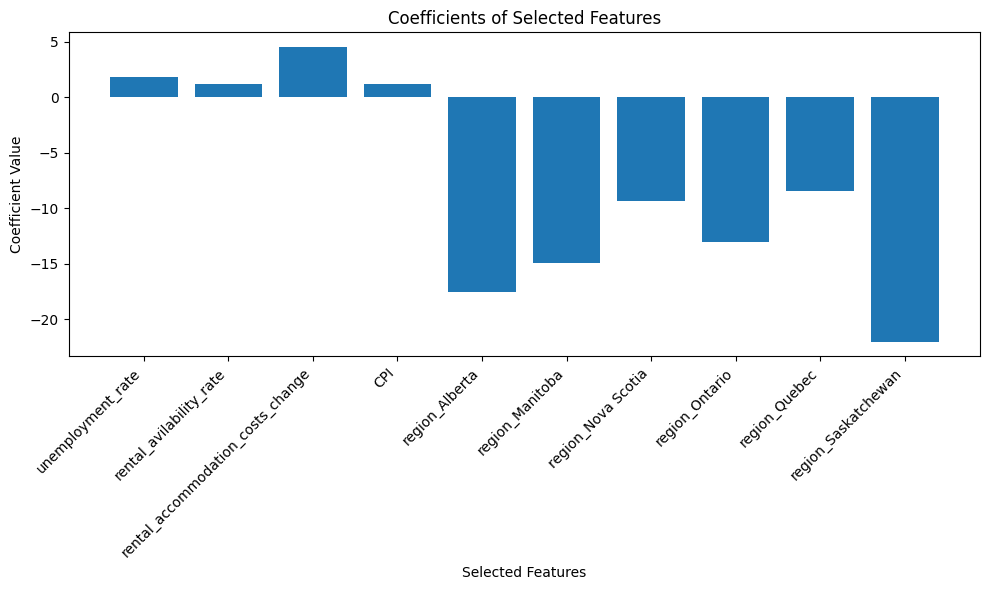

In [41]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

model = LinearRegression()

selector = SequentialFeatureSelector(model, direction='backward')

selector.fit(X_train, y_train)

selected_features = X_train.columns[selector.get_support()]

model.fit(X_train[selected_features], y_train)

y_pred = model.predict(X_test[selected_features])

mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
r2 = metrics.r2_score(y_test, y_pred)

print("Coefficients:")
for feature, coef in zip(selected_features, model.coef_):
    print(feature, ":", coef)

print("")
print("Selected Features:", selected_features)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

# Plotting the coefficients
plt.figure(figsize=(10, 6))
plt.bar(selected_features, model.coef_)
plt.xlabel('Selected Features')
plt.ylabel('Coefficient Value')
plt.title('Coefficients of Selected Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [42]:
from sklearn.linear_model import Lasso


model = Lasso(alpha=0.1)  

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
r2 = metrics.r2_score(y_test, y_pred)

print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(feature, ":", coef)

print("")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Coefficients:
population : -0.0007135468184775581
total_dwelling : 0.0004112536643394993
total_dwelling_market : -0.0003112045853426272
labour_participation_rate : -0.413970533093276
unemployment_rate : 3.3948369644112457
disposable_income_change : -0.26584609936069425
rental_vacancy_rate : -0.9897106265900741
rental_avilability_rate : 1.1800155818377411
owned_accommodation_costs_change : 0.2941974093977337
rental_accommodation_costs_change : 3.2314457337617886
CPI : 1.347775977654541
year : -0.11535960015889624
region_Alberta : -0.0
region_Manitoba : 0.0
region_New Brunswick : 8.505079260294744
region_Nova Scotia : -1.1001097592623192
region_Ontario : 0.0
region_Prince Edward Island : 3.5272342910893593
region_Quebec : 0.0
region_Saskatchewan : -4.23724929714863

Mean Squared Error (MSE): 54.598483636810144
Root Mean Squared Error (RMSE): 7.389078673069474
R-squared (R2): 0.8927330357960783


/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.077e+03, tolerance: 7.586e+00
  model = cd_fast.enet_coordinate_descent(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Random Forest Method

In [43]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor (n_estimators=100, random_state=156, max_features=30)

model_rf.fit(X_train, y_train)
preds_test = model_rf.predict(X_test)

MSE = metrics.mean_squared_error(y_test, preds_test)
R2 = metrics.r2_score(y_test, preds_test)

print("")
print("Mean Squared Error (MSE):", MSE)
print("R-squared (R2):", R2)


Mean Squared Error (MSE): 12.353504863636333
R-squared (R2): 0.9757296746038702


In [44]:
#Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV
import numpy as np

clf = RandomForestRegressor(random_state=156)

params = {
    'max_depth': np.arange(5,30,5),
    'n_estimators': np.arange(50,210,50)
}

grid_search = GridSearchCV(estimator=clf, param_grid=params, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_absolute_error', return_train_score=True)
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'max_depth': 10, 'n_estimators': 200}

In [45]:
#Evaluating the tuned model

clf_best = grid_search.best_estimator_

# Predicting on test set using the best estimator
y_test_pred = clf_best.predict(X_test)

# Calculating MSE and R-squared for the tuned model
MSEtu = metrics.mean_squared_error(y_test, y_test_pred)
R2tu = metrics.r2_score(y_test, y_test_pred)

print('Hyperparameter tuning of random forest yields MSE and R-squared:', MSEtu, R2tu)

Hyperparameter tuning of random forest yields MSE and R-squared: 12.178779238266465 0.9760729494744093
